# Feature Selection

Feature selection is the process of identifying and selecting a subset of input features that are most relevant to the target variable.

Feature selection is often straightforward when working with real-valued input and output data, such as using the Pearson’s correlation coefficient, but can be challenging when working with numerical input data and a categorical target variable.

The two most commonly used feature selection methods for numerical input data when the target variable is categorical (e.g. classification predictive modeling) are:

- ANOVA-f Statistic.
- Mutual Information Statistics.

### ANOVA f-test

ANOVA is an acronym for “analysis of variance” and is a parametric statistical hypothesis test for determining whether the means from two or more samples of data (often three or more) come from the same distribution or not.

An F-statistic, or F-test, is a class of statistical tests that calculate the ratio between variances values, such as the variance from two different samples or the explained and unexplained variance by a statistical test, like ANOVA. The ANOVA method is a type of F-statistic referred to here as an ANOVA f-test.

Importantly, ANOVA is used when one variable is numeric and one is categorical, such as numerical input variables and a classification target variable in a classification task.

The results of this test can be used for feature selection where those features that are independent of the target variable can be removed from the dataset.

"When the outcome is numeric, and […] the predictor has more than two levels, the traditional ANOVA F-statistic can be calculated." — Page 242, Feature Engineering and Selection, 2019.

**The scikit-learn machine library provides an implementation of the ANOVA f-test in the *f_classif()* function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class.**

In [22]:
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt

In [23]:
filename = 'data_27-05-2021.csv'
df = pd.read_csv(filename)
df

,distance,aspect,delta_heading,delta_altitude,delta_velocity,wez_max_own2trk,wez_nez_own2trk,wez_max_trk2own,wez_nez_trk2own,vul_thr_bef_shot,...,rwr_aircraft_warning,hp_tgt_ofensivity,hp_thr_vulnerability,own_shot_phi_long,own_shot_phi_medium,own_shot_phi_short,enemy_shot_phi_long,enemy_shot_phi_medium,enemy_shot_phi_short,dca_index
0,87597.401454,156.659122,134.262134,1981.240840,-0.577486,35.762241,9.383960,31.925061,8.654041,0.675140,...,0.0,0.004381,0.004381,0,0,1,0,0,1,0.627679
1,88638.600816,156.580036,133.242155,-1979.063686,0.594680,31.882673,8.676122,35.587813,9.354046,0.698301,...,0.0,0.006144,0.006144,0,0,1,1,0,0,0.646715
2,88892.829708,150.982223,83.477963,-606.720943,-0.066980,19.331238,7.777890,29.767125,7.508884,0.577344,...,0.0,0.003989,0.003989,1,0,0,0,1,0,0.115633
3,88441.224917,155.621190,111.293288,151.014463,3.072693,28.309615,8.260176,31.454548,8.669155,0.954911,...,0.0,0.005535,0.005535,0,1,0,1,0,0,0.332373
4,35822.060007,165.901209,47.757196,143.428417,7.848019,10.170417,7.964732,-1.000000,-1.000000,0.954911,...,0.0,0.006054,0.000000,0,1,0,1,0,0,0.522806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9360,30734.453675,179.040462,33.188695,-223.458862,-17.099398,7.398858,6.527613,-1.000000,-1.000000,0.162927,...,0.0,0.006331,0.000000,0,0,1,1,0,0,0.674485
9361,72346.427927,130.523076,60.610186,2.323086,-0.028185,16.433046,6.061779,22.195293,5.196923,0.051978,...,0.0,0.004681,0.004681,1,0,0,1,0,0,0.298276
9362,16658.724021,134.425564,151.539888,-26.439097,0.115436,28.049797,7.049873,21.818230,7.000619,0.051978,...,0.0,0.970705,0.958764,1,0,0,1,0,0,0.478450
9363,69067.064285,144.954036,25.565549,1409.924388,-0.391399,9.548427,6.642626,-1.000000,-1.000000,0.387971,...,0.0,0.005659,0.000000,1,0,0,1,0,0,0.323546


In [24]:
# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = pd.read_csv(filename)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    return X, y

# load the dataset
X, y = load_dataset(filename)

In [25]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [26]:
dic = {}

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %s %f' % (i+1,df.columns[i], fs.scores_[i]))
    dic[df.columns[i]] = fs.scores_[i]

Feature 1: distance 0.104205
Feature 2: aspect 0.011153
Feature 3: delta_heading 0.122245
Feature 4: delta_altitude 2.676872
Feature 5: delta_velocity 3.889260
Feature 6: wez_max_own2trk 1.910993
Feature 7: wez_nez_own2trk 1.069585
Feature 8: wez_max_trk2own 1.052149
Feature 9: wez_nez_trk2own 1.439525
Feature 10: vul_thr_bef_shot 0.069022
Feature 11: vul_thr_aft_shot 0.043736
Feature 12: shot_point 0.044138
Feature 13: rwr_aircraft_warning 0.358293
Feature 14: hp_tgt_ofensivity 0.341741
Feature 15: hp_thr_vulnerability 0.067109
Feature 16: own_shot_phi_long 0.193736
Feature 17: own_shot_phi_medium 0.639848
Feature 18: own_shot_phi_short 0.101463
Feature 19: enemy_shot_phi_long 6.545638
Feature 20: enemy_shot_phi_medium 1.078394
Feature 21: enemy_shot_phi_short 3.049000


In [27]:
import pandas as pd
scores = pd.DataFrame(dic.items(),columns = ['feature', 'score'])    
scores = scores.sort_values('score',ascending=False)

scores

,feature,score
18,enemy_shot_phi_long,6.545638
4,delta_velocity,3.889260
20,enemy_shot_phi_short,3.049000
3,delta_altitude,2.676872
5,wez_max_own2trk,1.910993
8,wez_nez_trk2own,1.439525
19,enemy_shot_phi_medium,1.078394
6,wez_nez_own2trk,1.069585
7,wez_max_trk2own,1.052149
16,own_shot_phi_medium,0.639848


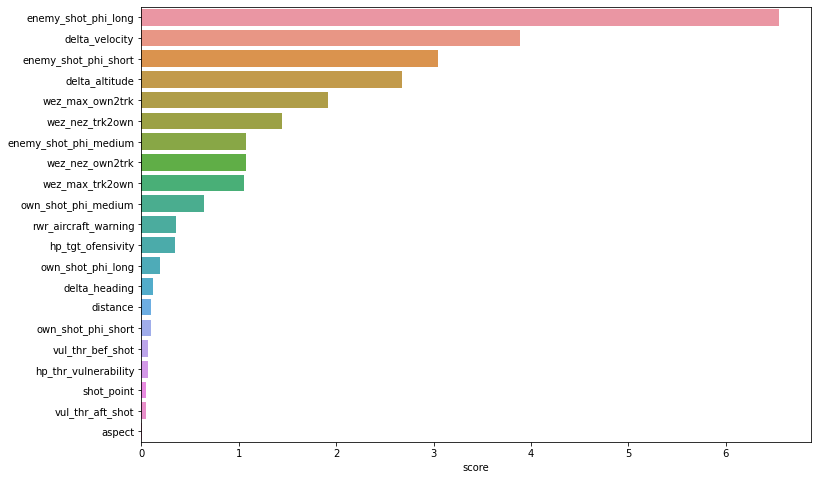

In [28]:
import seaborn as sns

# plot the scores
plt.figure(figsize=(12,8))
sns.barplot(x=scores['score'],y=[i for i in scores['feature']],orient='horizontal' );

In this case, we can see that some features stand out as perhaps being more relevant than others, with much larger test statistic values.

A bar chart of the feature importance scores for each input feature is created.

This clearly shows that feature 1 might be the most relevant (according to test) and that perhaps six more input features are the more relevant.

We could set k=7 when configuring the SelectKBest to select these top seven features.

### Mutual Information

Mutual information from the field of information theory is the application of information gain (typically used in the construction of decision trees) to feature selection.

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

Mutual information is straightforward when considering the distribution of two discrete (categorical or ordinal) variables, such as categorical input and categorical output data. Nevertheless, it can be adapted for use with numerical input and categorical output.

For technical details on how this can be achieved, see the 2014 paper titled “Mutual Information between Discrete and Continuous Data Sets.” (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3929353/)

**The scikit-learn machine learning library provides an implementation of mutual information for feature selection with numeric input and categorical output variables via the *mutual_info_classif()* function. Like *f_classif()*, it can be used in the *SelectKBest* feature selection strategy (and other strategies).**

In [29]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
     
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [30]:
dic = {}

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %s %f' % (i+1,df.columns[i], fs.scores_[i]))
    dic[df.columns[i]] = fs.scores_[i]

Feature 1: distance 0.000000
Feature 2: aspect 0.000000
Feature 3: delta_heading 0.004752
Feature 4: delta_altitude 0.000000
Feature 5: delta_velocity 0.000000
Feature 6: wez_max_own2trk 0.017728
Feature 7: wez_nez_own2trk 0.007807
Feature 8: wez_max_trk2own 0.000000
Feature 9: wez_nez_trk2own 0.019755
Feature 10: vul_thr_bef_shot 0.001287
Feature 11: vul_thr_aft_shot 0.003827
Feature 12: shot_point 0.016775
Feature 13: rwr_aircraft_warning 0.001299
Feature 14: hp_tgt_ofensivity 0.000000
Feature 15: hp_thr_vulnerability 0.013044
Feature 16: own_shot_phi_long 0.000000
Feature 17: own_shot_phi_medium 0.000000
Feature 18: own_shot_phi_short 0.000000
Feature 19: enemy_shot_phi_long 0.000000
Feature 20: enemy_shot_phi_medium 0.004540
Feature 21: enemy_shot_phi_short 0.000838


In [31]:
import pandas as pd
scores = pd.DataFrame(dic.items(),columns = ['feature', 'score'])    
scores = scores.sort_values('score',ascending=False)

scores['feature'][:10]

8           wez_nez_trk2own
5           wez_max_own2trk
11               shot_point
14     hp_thr_vulnerability
6           wez_nez_own2trk
2             delta_heading
19    enemy_shot_phi_medium
10         vul_thr_aft_shot
12     rwr_aircraft_warning
9          vul_thr_bef_shot
Name: feature, dtype: object

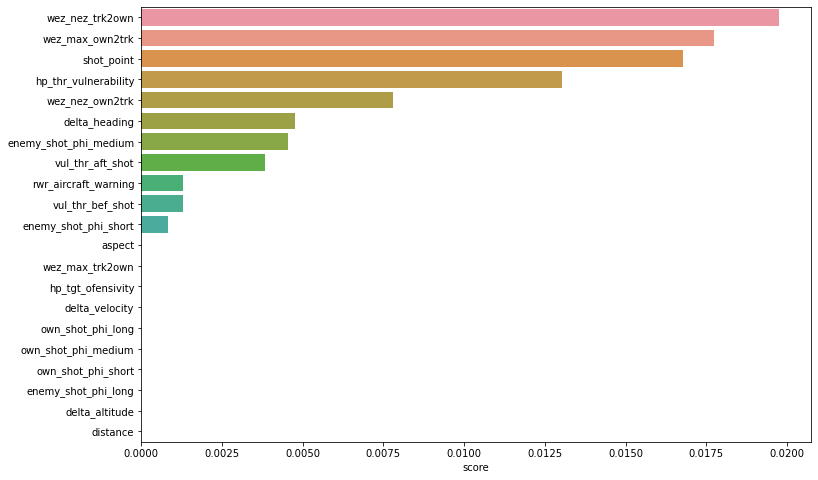

In [33]:
import seaborn as sns

# plot the scores
plt.figure(figsize=(12,8))
sns.barplot(x= scores['score'],y=[i for i in scores['feature']],orient='horizontal' );

### Source

- https://machinelearningmastery.com/rfe-feature-selection-in-python/